In [1]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import he_normal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
%matplotlib notebook
%matplotlib inline
def plt_dynamic(x, vy, ty, ax, color=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('Number of train datapoints are {} and size of each training data is ({}, {})'.format(X_train.shape[0], X_train.shape[1],X_train.shape[2]))
print('Number of test datapoints are {} and size of each training data is ({}, {})'.format(X_test.shape[0], X_test.shape[1],X_test.shape[2]))

Number of train datapoints are 60000 and size of each training data is (28, 28)
Number of test datapoints are 10000 and size of each training data is (28, 28)


In [5]:
print("A sample training data point is :\n", X_train[20])

A sample training data point is :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238

In [6]:
print('Label for above training datapoint is: {}'.format(y_train[20]))

Label for above training datapoint is: 4


In [7]:
#since y label is a single numeric digit, we want to convert it into one hot encoded value
print("A sample train label before on hot encoding: {}".format(y_train[20]))
y_train=utils.to_categorical(y_train, 10)
y_test=utils.to_categorical(y_test, 10)
print("A sample train label after on hot encoding: {}".format(y_train[20]))

A sample train label before on hot encoding: 4
A sample train label after on hot encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])


In [10]:
print('Shape of X_train is: {}'.format(X_train.shape))
print('Shape of X_test is: {}'.format(X_test.shape))

Shape of X_train is: (60000, 784)
Shape of X_test is: (10000, 784)


In [11]:
#normalize input data
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

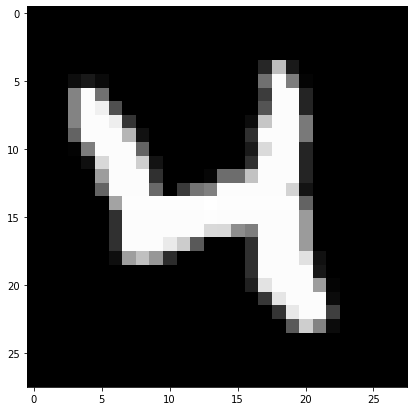

In [13]:
from PIL import Image
plt.figure(figsize=(7,7))
img=X_train[20].reshape(28,28)
plt.imshow(img, interpolation = "none", cmap = "gray")
plt.show()

In [14]:
#normalise the train and test data
X_train=X_train/255
X_test=X_test/255

In [15]:
#An example datapoint after Normalising
X_train[20]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [17]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 40

#1. MLP with 3 hidden layers

In [18]:
model_1 = Sequential()


model_1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_1.add(BatchNormalization())
#model_1.add(Dropout(0.70))

model_1.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.60))

model_1.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_1.add(BatchNormalization())
#model_1.add(Dropout(0.70))

model_1.add(Dense(output_dim, activation='softmax'))


model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [19]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/40
469/469 [==============================] - 11s 10ms/step - loss: 0.3511 - accuracy: 0.8928 - val_loss: 2.1303 - val_accuracy: 0.1774
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1994 - accuracy: 0.9393 - val_loss: 0.1147 - val_accuracy: 0.9641
Epoch 3/40
469/469 [==============================] - 3s 5ms/step - loss: 0.1625 - accuracy: 0.9503 - val_loss: 0.1195 - val_accuracy: 0.9612
Epoch 4/40
469/469 [==============================] - 3s 5ms/step - loss: 0.1477 - accuracy: 0.9548 - val_loss: 0.1034 - val_accuracy: 0.9671
Epoch 5/40
469/469 [==============================] - 3s 5ms/step - loss: 0.1302 - accuracy: 0.9593 - val_loss: 0.0923 - val_accuracy: 0.9723
Epoch 6/40
469/469 [==============================] - 3s 5ms/step - loss: 0.1218 - accuracy: 0.9623 - val_loss: 0.1036 - val_accuracy: 0.9688
Epoch 7/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1133 - accuracy: 0.9641 - val_loss: 0.0780 - val_accuracy: 0.9753
Epoc

Test score: 0.06918569654226303
Test accuracy: 0.9807999730110168


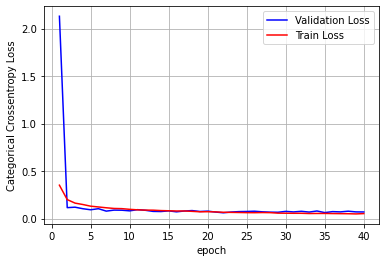

In [20]:
score = model_1.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

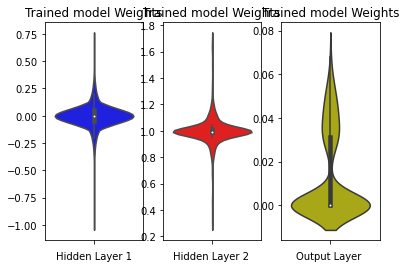

In [21]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#2. MLP with 5 hidden layers

In [22]:
model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
#model_2.add(Dropout(0.70))

model_2.add(Dense(412, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
#model_2.add(Dropout(0.70))

model_2.add(Dense(312, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.70))

model_2.add(Dense(214, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.70))

model_2.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.70))

model_2.add(Dense(42, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_2.add(BatchNormalization())
#model_2.add(Dropout(0.80))

model_2.add(Dense(output_dim, activation='softmax'))

In [23]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/40
469/469 [==============================] - 5s 8ms/step - loss: 1.1437 - accuracy: 0.6262 - val_loss: 3.5854 - val_accuracy: 0.1340
Epoch 2/40
469/469 [==============================] - 4s 8ms/step - loss: 0.3891 - accuracy: 0.8932 - val_loss: 0.2173 - val_accuracy: 0.9377
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2561 - accuracy: 0.9325 - val_loss: 0.1438 - val_accuracy: 0.9616
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2061 - accuracy: 0.9468 - val_loss: 0.1187 - val_accuracy: 0.9711
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1698 - accuracy: 0.9559 - val_loss: 0.1195 - val_accuracy: 0.9703
Epoch 6/40
469/469 [==============================] - 4s 7ms/step - loss: 0.1523 - accuracy: 0.9617 - val_loss: 0.1125 - val_accuracy: 0.9712
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1329 - accuracy: 0.9657 - val_loss: 0.1245 - val_accuracy: 0.9694
Epoch 

Test score: 0.10544922202825546
Test accuracy: 0.979200005531311


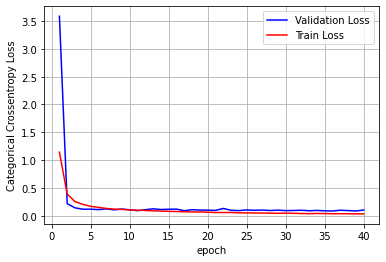

In [24]:
score = model_2.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

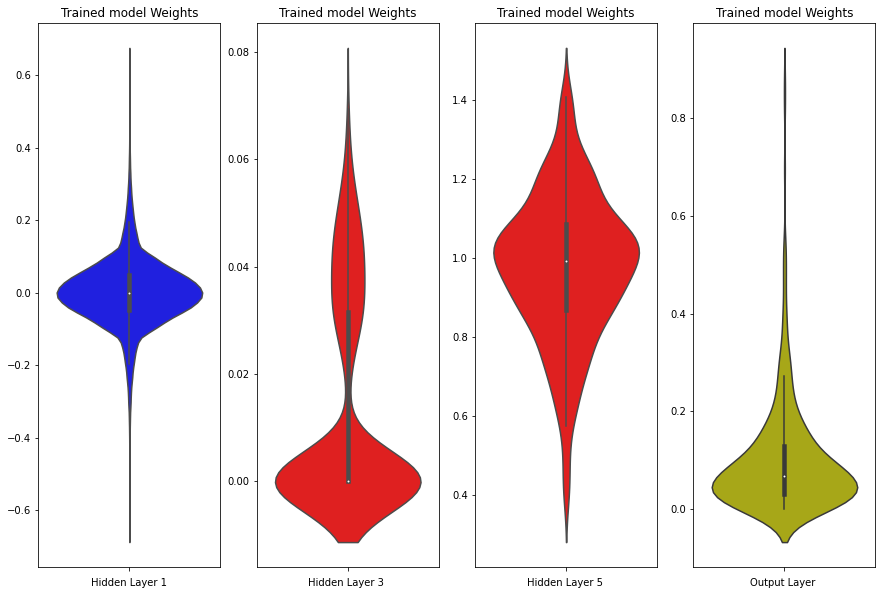

In [25]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#3. MLP with 7 hidden layers

In [26]:
model_3 = Sequential()

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed=None)) )
model_3.add(BatchNormalization())
#model_3.add(Dropout(0.70))

model_3.add(Dense(412, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
#model_3.add(Dropout(0.80))

model_3.add(Dense(312, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.70))

model_3.add(Dense(212, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.60))

model_3.add(Dense(164, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.60))

model_3.add(Dense(92, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
#model_3.add(Dropout(0.70))

model_3.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
#model_3.add(Dropout(0.80))

model_3.add(Dense(output_dim, activation='softmax'))

In [27]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/40
469/469 [==============================] - 6s 9ms/step - loss: 0.9687 - accuracy: 0.6861 - val_loss: 4.1359 - val_accuracy: 0.1102
Epoch 2/40
469/469 [==============================] - 4s 8ms/step - loss: 0.3093 - accuracy: 0.9133 - val_loss: 0.1698 - val_accuracy: 0.9534
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2206 - accuracy: 0.9395 - val_loss: 0.1427 - val_accuracy: 0.9645
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1737 - accuracy: 0.9527 - val_loss: 0.1508 - val_accuracy: 0.9610
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1546 - accuracy: 0.9589 - val_loss: 0.1349 - val_accuracy: 0.9644
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1383 - accuracy: 0.9627 - val_loss: 0.1527 - val_accuracy: 0.9629
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1222 - accuracy: 0.9673 - val_loss: 0.1351 - val_accuracy: 0.9666
Epoch 

Test score: 0.08296863734722137
Test accuracy: 0.9818999767303467


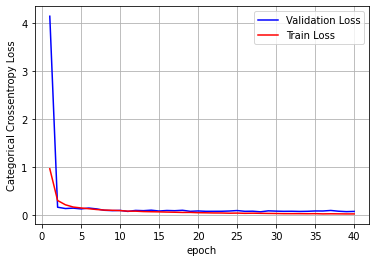

In [28]:
score = model_3.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

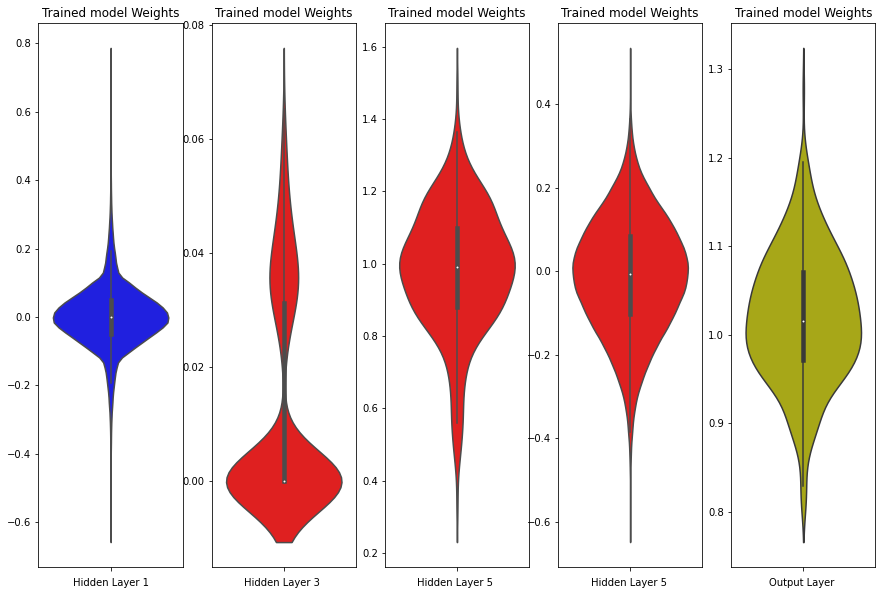

In [29]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h7_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [32]:
from prettytable import PrettyTable
x= PrettyTable()
x.field_names=['MLP Architecture', 'epochs', 'Test accuracy']
x.add_row(['3 layer', '40', '0.9878'])
x.add_row(['5 layer', '40' ,'0.9792'])
x.add_row(['7 layer', '40' ,'0.9819' ])

print(x)

+------------------+--------+---------------+
| MLP Architecture | epochs | Test accuracy |
+------------------+--------+---------------+
|     3 layer      |   40   |     0.9878    |
|     5 layer      |   40   |     0.9792    |
|     7 layer      |   40   |     0.9819    |
+------------------+--------+---------------+
